My name is Amrita Pudasaini. In Week 4, we learned about complex processes of data transformation and mapping in Python with a particular emphasis on utilizing Pandas. We looked at how to implement custom as well as inbuilt functions by columns and rows by using features like .apply() and .map(). It enabled us to change datasets algorithmically, which was essential in a way to prepare them for analysis. Data cleaning methods were another area of our focus here, and we were exercised on how to perform missing values, removing redundancy, and other ways of cleaning the data set.

Furthermore, it enlightened us with the concept of grouping and aggregations, this was used in categorizing data using functions such as groupby together with operations in mean, sum and count. Sorting techniques as particular aspects of data arrangement were focused where raw data was categorized in either rising or falling order with regard to specific conditions or related graphical lines. Finally, we learn about more complex form of data visualization using Matplotlib and Seaborn which includes bar plots, scatter plots and heat maps. A key takeaway from this week’s learning is that data preparation, and data visualization must go hand in hand to identify patterns and trends that are present in large datasets.

# Data Transformation and Mapping 
- apply: allows us to apply a function to each element, row, or column in a DataFrame or Series.
- map: is used to map values in a Series according to a dictionary or another series.
- replace: allows for replacing specific values in the DataFrame with new value.
- astype: used to convert datatype.
- pipe: it allows chaining and using complex functions that operate on the entire DataFrame. This can be used for complex transformation operation.

apply

In [7]:
# convert marks to scale of 1
import pandas as pd
students = pd.read_csv('data/student.csv')
students['mark_percent'] = students['mark'].apply(lambda m:m /100)
students.head()

,id,name,class,mark,gender,mark_percent
0,1,John Deo,Four,74,female,0.74
1,2,Max Ruin,Three,85,male,0.85
2,3,Arnold,Three,55,male,0.55
3,4,Krish Star,Four,60,female,0.60
4,5,John Mike,Four,60,female,0.60


map

In [8]:
# Replace
students['grade'] = students['class'].map({'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five': 5, 'Six':6, 'Seven':7, 'Eight':8, 'Nine':9, 'Ten':10})

students['gender_code'] = students['gender'].map({'male':1, 'female':2})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,74,female,0.74,4.0,2
1,2,Max Ruin,Three,85,male,0.85,3.0,1
2,3,Arnold,Three,55,male,0.55,3.0,1
3,4,Krish Star,Four,60,female,0.60,4.0,2
4,5,John Mike,Four,60,female,0.60,4.0,2


replace

In [9]:
# Replace specific values in the 'class' column
students['class'] = students['class'].replace({'Four': '4th', 'Ten': '10th', 'Eight': '8th'})
# replace name 'John Deo' with 'JaiRam' (replace specific value)
students['name'] = students['name'].replace({'John Deo':'JaiRam'})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,JaiRam,4th,74,female,0.74,4.0,2
1,2,Max Ruin,Three,85,male,0.85,3.0,1
2,3,Arnold,Three,55,male,0.55,3.0,1
3,4,Krish Star,4th,60,female,0.60,4.0,2
4,5,John Mike,4th,60,female,0.60,4.0,2


astype

In [10]:
# Convert 'mark' column to float
students['mark'] = students['mark'].astype(float)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,JaiRam,4th,74.0,female,0.74,4.0,2
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1
2,3,Arnold,Three,55.0,male,0.55,3.0,1
3,4,Krish Star,4th,60.0,female,0.60,4.0,2
4,5,John Mike,4th,60.0,female,0.60,4.0,2


pipe

In [11]:
# create function that triples marks and pipes it to the pandas DataFrame

def triple_marks(df):
    df['mark'] = df['mark'] * 3
    return df

def check_result(df):
    df['result'] = df['mark'].apply(lambda m :'Pass' if m>40 else 'Fail')
    return df

students = students.pipe(check_result)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code,result
0,1,JaiRam,4th,74.0,female,0.74,4.0,2,Pass
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1,Pass
2,3,Arnold,Three,55.0,male,0.55,3.0,1,Pass
3,4,Krish Star,4th,60.0,female,0.60,4.0,2,Pass
4,5,John Mike,4th,60.0,female,0.60,4.0,2,Pass


# Data Cleaning and Manipulation
- Handle Missing Data
- Handle Duplicates
- One-Hot-Encoding
- Normalization

# Handle Missing Data
- Removes Rows containing missing values ``(df.dropna())``
    - ``dropna(axis=0)`` removes rows containing at least one missing value
    - ``(dropna(axis=1))`` removes columns containing at least one missing value
- Replace Missing Values ``(df.fillna())``
    - Replace with specific value: ``(df.fillna(value))`` fill the missing values with the previous row value of column value (if axis=1)
    - Backward Fill: ``(df.fillna(value,method='ffill'))`` replaces the missing values with the next value
    - Fill individual column with specified value: ``(df.fillna({'height':150,'weight:60}``) replaces the missing values of column height with 150 and column weight with 60
    - Fill with average, Interpolation etc.: Fill the missing value using average, or using interpolation

In [12]:
from IPython.display import display
# axis, 0=row, 1=column

students = pd.read_csv('data/student.csv')
display(students.head())

#students.dropna(axis=0,how='any,inplace=True) # (axis=0 default) drop rows withNaN

students = students.fillna(1) # replace missing values with 1
display(students.head())

students.fillna(method='ffill') #fill with previous row value
students.fillna(method='bfill') #fill with next row value
students['mark'].fillna(50) # only fill empty value of Name column
students.fillna({'mark':50,'gender':'Male'}) # replace marks with 50 if its empty and gender with male
df_interpolated = students.interpolate()
students.fillna(df_interpolated)
students['mark'].fillna(students['mark'].mean())


,id,name,class,mark,gender
0,1,John Deo,Four,74,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


,id,name,class,mark,gender
0,1,John Deo,Four,74,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


C:\Users\pudas\AppData\Local\Temp\ipykernel_4564\3593965366.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method='ffill') #fill with previous row value
C:\Users\pudas\AppData\Local\Temp\ipykernel_4564\3593965366.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method='bfill') #fill with next row value
C:\Users\pudas\AppData\Local\Temp\ipykernel_4564\3593965366.py:16: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = students.interpolate()


0     74
1     85
2     55
3     60
4     60
5     55
6     78
7     85
8     78
9     55
10    89
11    94
12    88
13    88
14    88
15    88
16    54
17    75
18    18
19    65
20    69
21    55
22    79
23    78
24    88
25    79
26    81
27    86
28    55
29    79
30    88
31    90
32    96
33    69
34    88
Name: mark, dtype: int64

# Handle Duplicate Data
- Check duplicates
- Drop duplicates

In [13]:
duplicates = students.duplicated() # check duplicate
students.drop_duplicates() #drop duplicate
duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

# One-Hot-Encoding
- One Hot Encoding is a method for converting categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a seperate column, where a value of 1 indicates the presence that category, and 0 indicates its absence. For example we replace the country name with numerical value eg. America=1, Nepal= 2, India=3

In [14]:
students = pd.read_csv('data/student.csv')
df_pandas_encoded = pd.get_dummies(students, columns=['class'])
print(f"One-Hot Encoded Data using Pandas:\n")
display(df_pandas_encoded)

One-Hot Encoded Data using Pandas:



,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,74,female,False,False,False,True,False,False,False,False
1,2,Max Ruin,85,male,False,False,False,False,False,False,False,True
2,3,Arnold,55,male,False,False,False,False,False,False,False,True
3,4,Krish Star,60,female,False,False,False,True,False,False,False,False
4,5,John Mike,60,female,False,False,False,True,False,False,False,False
5,6,Alex John,55,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78,male,False,True,False,False,False,False,False,False
7,8,Asruid,85,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78,male,False,False,False,False,False,False,True,False
9,10,Big John,55,female,False,False,False,True,False,False,False,False


# Data Normalization
- Data normalization involves adjusting measurement values of different scales to a common scale. Normalization is only applicable to numerical columns.

There are five common normalization methods:
- Single-feature scaling
- 



In [15]:
import pandas as pd
import numpy as np
products = pd.read_csv('data/product-data.csv')
#Sibgle Feature Scaling
products['Sales_Single _Scale'] = products['Sales'] / products['Sales'].max()

#log
products['Sales_Log_Scale'] = np.log1p(products['Sales'])

#Clapping
products['Discount_Clipped'] = products['Discount_Percentage'].clip(lower=5, upper=15)

products

,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single _Scale,Sales_Log_Scale,Discount_Clipped
0,1,500,200,4.2,10,0.50,6.216606,10
1,2,700,450,3.9,15,0.70,6.552508,15
2,3,800,300,4.5,12,0.80,6.685861,12
3,4,900,350,4.8,8,0.90,6.803505,8
4,5,1000,500,4.0,5,1.00,6.908755,5
5,6,300,250,3.7,20,0.30,5.707110,15
6,7,450,275,4.3,17,0.45,6.111467,15
7,8,620,320,3.8,7,0.62,6.431331,7
8,9,750,400,4.1,6,0.75,6.621406,6
9,10,850,375,4.6,14,0.85,6.746412,14


# Grouping and Aggregate
Grouping consists of three operation
- split
- apply
- combine

In [16]:
import numpy as np
from IPython.display import display

students = pd.read_csv('data/student.csv')

#group data based on gender
gender_data = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean()

#standard deviation (std())
group_by_class = students.groupby('class')
display(group_by_class['mark'].mean())
display(group_by_class['mark'].count())

,id,name,class,mark
gender,,,,
female,17,17,17,17
male,18,18,18,18


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.777778
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: mark, dtype: float64

class
Eight     1
Fifth     1
Five      2
Four      9
Nine      2
Seven    10
Six       7
Three     3
Name: mark, dtype: int64

# Aggregation
- count()-Number of non-pull observations
- sum()-Sum of values
- mean()-Mean of values
- median()-Arithmetic median of values
- min()-minumim
- max()-maximum
- mode()-mode
- std()-Standard deviation
- var()- Variance

# Sorting
## Sort by Index
## Sort By Value

- Ascending
- Descending
- Sorting by Date
- Sorting with key function

In [17]:
country_data_list = [
            ['Afganistan', 1952, 8425333, 'Asia'],
            ['Austalia', 1957, 9712569, 'Oceania'],
            ['Brazil', 1962, 76039390, 'America']
]
country_data = pd.DataFrame(country_data_list, columns=['Country', 'Year', 'Population', 'Continent'])
new_sorted_data = country_data.sort_values(by=['Country'],ascending=True)
display(new_sorted_data)

sort_by_descending = country_data.sort_values(by=['Country'],ascending=False)
display(sort_by_descending)
sort_by_population = country_data.sort_values(by=['Population', 'Country'],ascending=False)
display(sort_by_population)

,Country,Year,Population,Continent
0,Afganistan,1952,8425333,Asia
1,Austalia,1957,9712569,Oceania
2,Brazil,1962,76039390,America


,Country,Year,Population,Continent
2,Brazil,1962,76039390,America
1,Austalia,1957,9712569,Oceania
0,Afganistan,1952,8425333,Asia


,Country,Year,Population,Continent
2,Brazil,1962,76039390,America
1,Austalia,1957,9712569,Oceania
0,Afganistan,1952,8425333,Asia


# Sorting By Data
### If we want sort data based on datetime we need to convert the datetime to datetime object.

In [18]:
data = pd.read_csv('data/student-admission.csv')

#convert to datetime
data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])

#sort by AdmissionDate
sorted_by_date = data.sort_values(by=['AdmissionDate','Name'],ascending=True)
sorted_by_date

,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
5,5,2021-01-17,1,Abhinav,IT
3,3,2021-01-18,2,Sohan,Mechanical
2,2,2021-01-20,3,Mohan,Civil
6,6,2021-01-21,4,Danny,EEE
4,4,2021-01-22,6,Lucky,CSE
1,1,2021-01-22,5,Shyam,ECE
0,0,2021-01-25,7,Ram,CSE


# Data Visualization with Matplotlib Seaborn




# Chart Type Organized by Data Analysis Goals
- Comparisons: Bar Graph(vertical, Horizontal, Grouped, Stacked), Line Chart, Multiple Line Graph, Radar Cgart, Gantt Chart 
- Relationships: Scatter Plot, Bubble Chart, Heat Map, Density Plot, Correlation Matrix
- Distributions: Histogram, Box Plot (Box-and-Whisker Plot), Violin Plot, Frequency Ploygon, Stem-andLeaf Plot, Cumulatio=ve Frequency Distribution Chart
- Compositions: Pie Chart, Doughnut Chart, Stacked Bar Graph, Stacked Area Chart, Funnel Chart

# Data Comparison Visualization
- Bar Charts
- Line Graph
- Multiple Line Graphs

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Compare GPD Growth of Nepal and India and China
- Bar Chart
- Line Graph

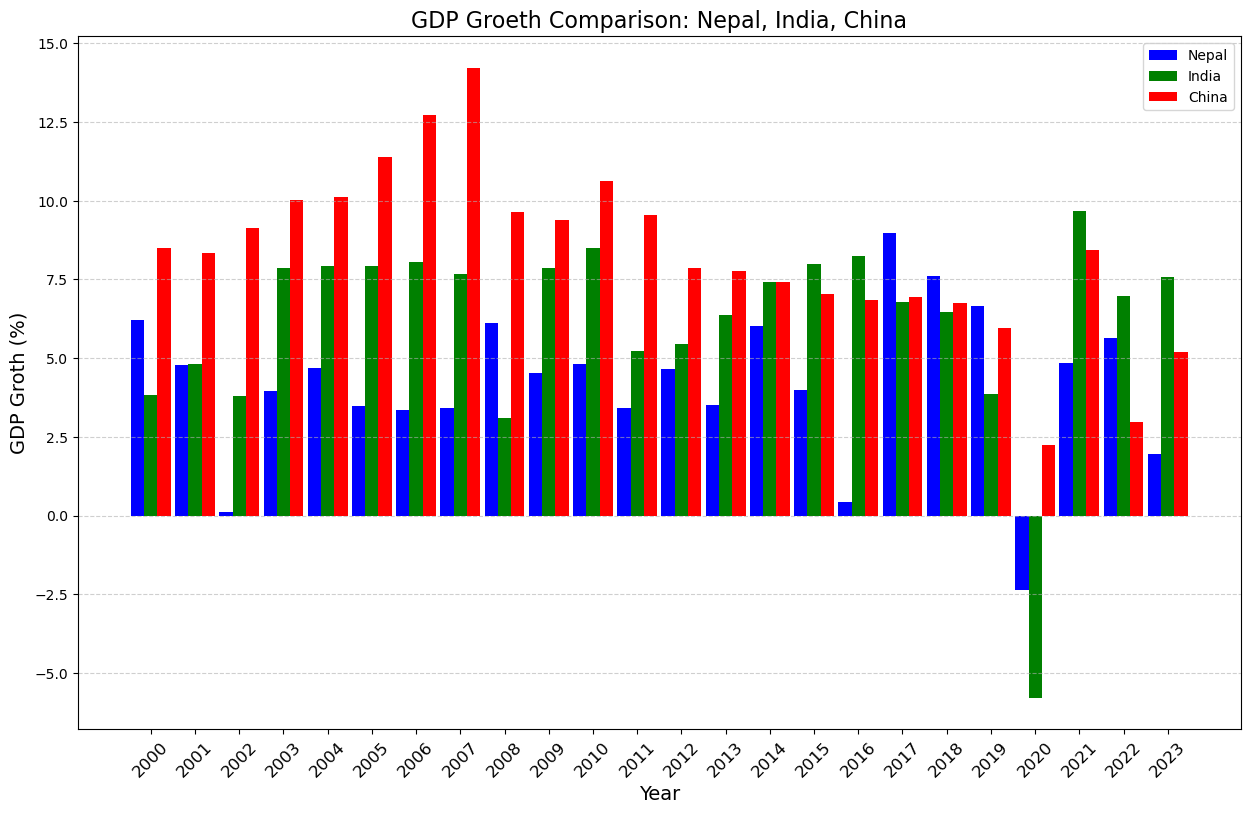

In [20]:
import matplotlib.pyplot as plt
nep_ind_china_gdp_data=pd.read_csv('data/nep-india-china-gdp.csv')
#set up the figure size
plt.figure(figsize=(15,9))

#define the width of the bars
width=0.3
x=range(len(nep_ind_china_gdp_data['Year']))

#plotting the bars for Nepal India and China
plt.bar([i -width for i in x], nep_ind_china_gdp_data['Nepal'], width=width, label ='Nepal', color='blue' )
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label='India', color='green')
plt.bar([i+ width for i in x], nep_ind_china_gdp_data['China'], width=width, label='China', color= 'red')
#adding titles and labels
plt.title('GDP Groeth Comparison: Nepal, India, China', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Groth (%)', fontsize=14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12, rotation=45)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Line Graph

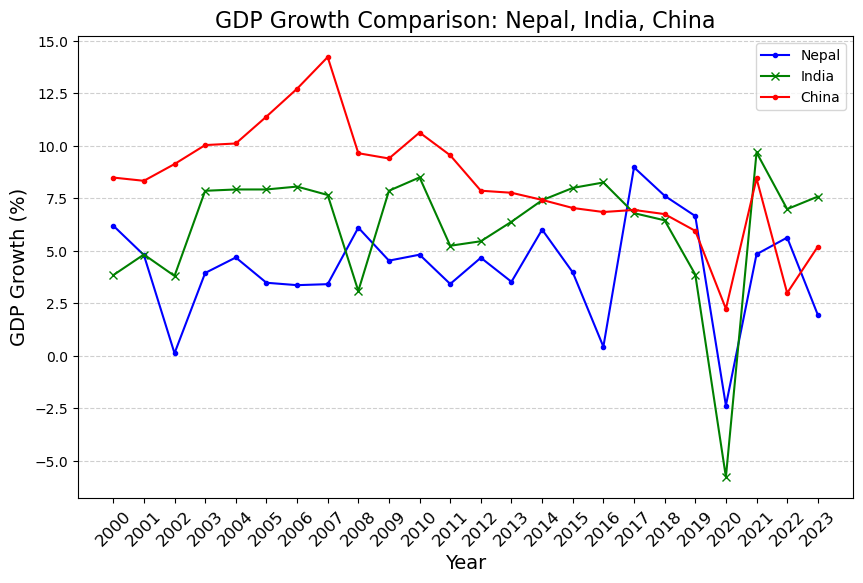

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

# Set up the figure size
plt.figure(figsize=(10, 6))

# Plotting the line for Nepal, India, and China
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['Nepal'], label='Nepal', color='blue', marker='.')
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['India'], label='India', color='green', marker='x')
plt.plot(nep_ind_china_gdp_data['Year'], nep_ind_china_gdp_data['China'], label='China', color='red', marker='.')

# Adding titles and labels
plt.title('GDP Growth Comparison: Nepal, India, China', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(nep_ind_china_gdp_data['Year'], fontsize=12, rotation=45)
plt.legend()

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()


# Visualize Relationship Between Data
- Scatter Plot: A scatter plot identifies a possible relationship between changes observed in two different sets of variables.
- Bubble Chart: A bubble chart can be used to represent the relationship between x (age), (income), and bubble size (expense).
- Heat Map: Heat maps are graphical representations of data that use colors to show the intensity of a variable or a relationship.
- Density Plot: A Density Plot visualises the distribution of data over a continuous interval or time period.
- Correlation Matrix: A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set.

# Scatter Plot

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


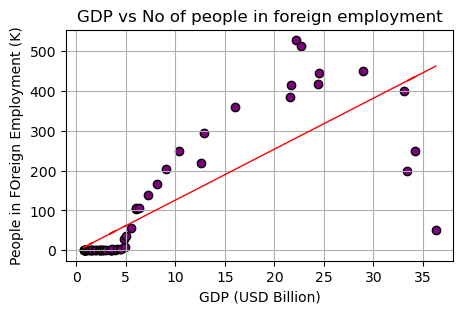

In [22]:
from IPython.display import display
import numpy as np
 # Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n : n/1000)
display(nepal_economy.head())

plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black'
)

# Fit a linear regression model to the data
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c = np.polyfit(x, y, 1) #1 is degree of polynomial y = mx+c is of degree 1

# Plot the trend line
plt.plot(x, m * x + c, color = 'red', linewidth=1, label='GDP-FE-Trend-Line')
plt.title('GDP vs No of people in foreign employment')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in FOreign Employment (K)')
plt.grid(True)

#Display the plot
plt.show()

# Bubble Chart

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


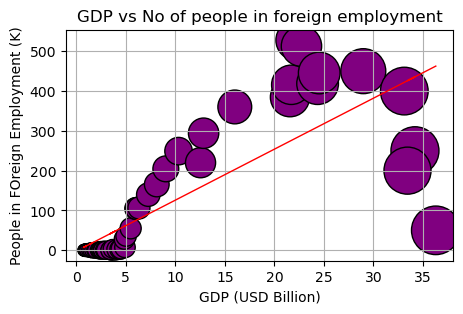

In [23]:
# x= nepal_economy['GDP,
# y = nepal_economy['no_of_people_in_foreign_employment]]

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 # Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n : n/1000)
display(nepal_economy.head())

plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black',
    s = nepal_economy['per_capita']
)

# Fit a linear regression model to the data
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c = np.polyfit(x, y, 1) #1 is degree of polynomial y = mx+c is of degree 1

# Plot the trend line
plt.plot(x, m * x + c, color = 'red', linewidth=1, label='GDP-FE-Trend-Line')
plt.title('GDP vs No of people in foreign employment')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in FOreign Employment (K)')
plt.grid(True)

#Display the plot
plt.show()

# Heat Map

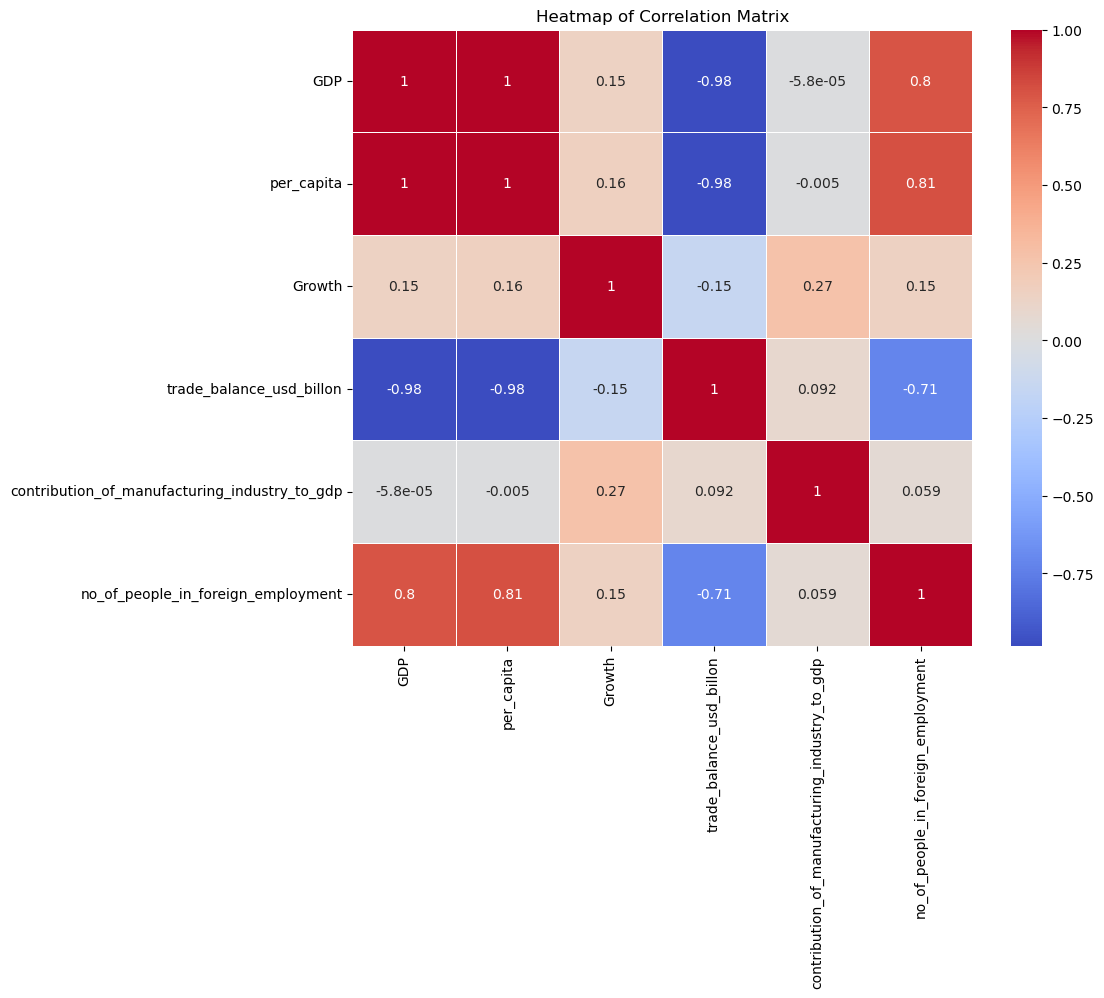

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
correlation_matrix = nepal_economy.drop(columns=['Year'], inplace=False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Distributions
- Histogram: Histogram is used to describe numecical data which have grouped into frequency distribution
- Frequency Polygon: Frequency Polygon can be constructed simply by joining the upper mid point of histogram
- Cumulative Frequency Distribution (ogive): Cumulative frequency distribtion facilitates to see how may observations lie above or below certain values and is also graphicial presentation of frequency distribution.
- Box Plot: It shows the Pive Point summary (Min,Q1, Median, Q3, Max) and outliers

# Histogram

[0, 20, 40, 60, 80, 100]


,Marks,no_of_students,mid_points,bins
0,0-20,10,10.0,"(0, 20]"
1,20-40,22,30.0,"(20, 40]"
2,40-60,35,50.0,"(20, 40]"
3,60-80,28,70.0,"(20, 40]"
4,80-100,5,90.0,"(0, 20]"


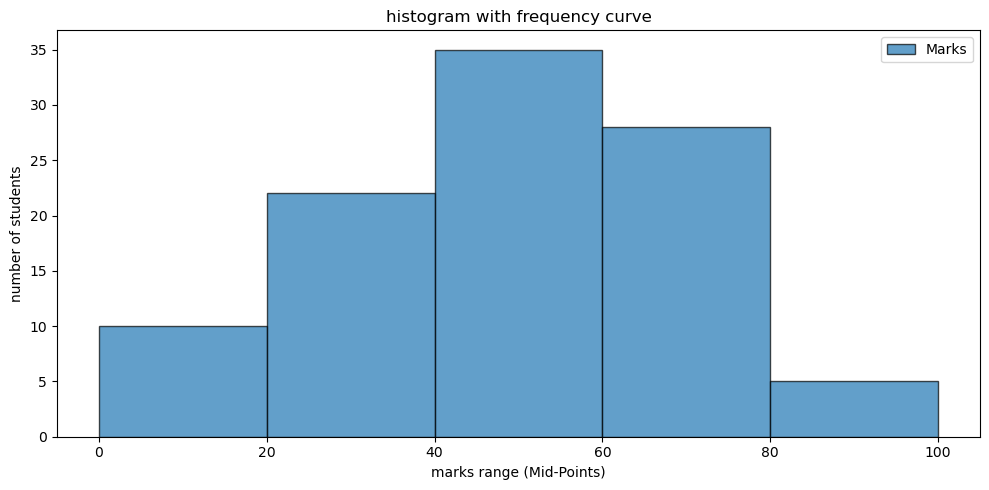

In [25]:
students_data = pd.DataFrame({
    'Marks':['0-20','20-40','40-60','60-80','80-100'],
    'no_of_students':[10,22,35,28,5]
})
students_data['mid_points'] = students_data['Marks'].apply(lambda m:( int( m.split('-')[0]) + int( m.split('-')[1]))/2)
lower_bounds= students_data[ 'Marks'].apply(lambda m: int(m.split('-')[0]) ).min()
upper_bounds =  students_data['Marks'].apply(lambda m: int(m.split('-')[1])).max()

bin_edges = list(range(lower_bounds, upper_bounds + 1, 20))
students_data['bins'] = pd.cut(x=students_data['no_of_students'], bins=bin_edges)
print(bin_edges)
display(students_data.head())
plt.figure(figsize=(10,5))

# use mid points as the x-values for the histogram and the frequency y-values
plt.hist(students_data['mid_points'], bins=bin_edges, weights=students_data['no_of_students'], edgecolor='black', alpha=0.7, label='Marks')
#add labels and titles
plt.xlabel('marks range (Mid-Points)')
plt.ylabel('number of students')
plt.title('histogram with frequency curve')

plt.legend()
plt.tight_layout()
plt.show()

# Frequency Polygon

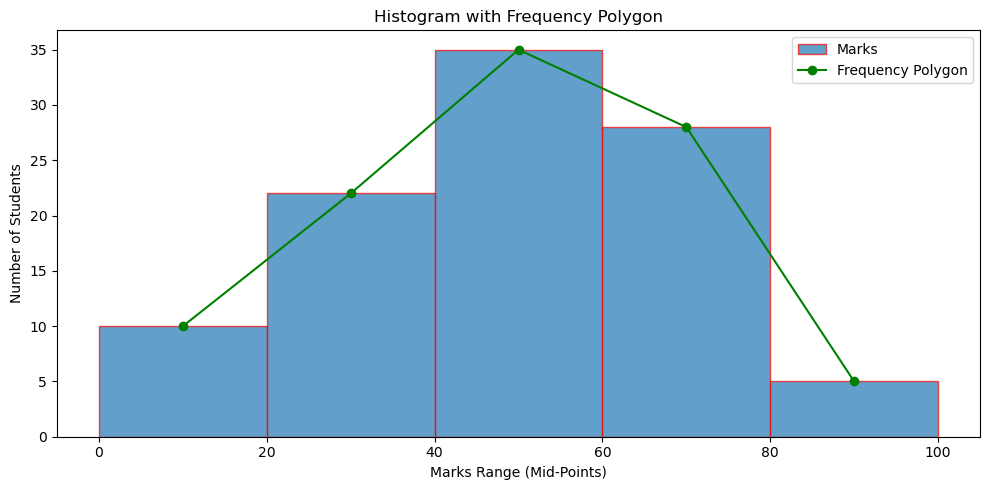

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

students_data = pd.DataFrame({
    'Marks': ['0-20', '20-40', '40-60', '60-80', '80-100'],
    'no_of_students': [10, 22, 35, 28, 5]
})

# Calculate midpoints
students_data['mid_points'] = students_data['Marks'].apply(lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) / 2)

# Define bins
lower_bounds = students_data['Marks'].apply(lambda m: int(m.split('-')[0])).min()
upper_bounds = students_data['Marks'].apply(lambda m: int(m.split('-')[1])).max()
bin_edges = list(range(lower_bounds, upper_bounds + 1, 20))

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(students_data['mid_points'], bins=bin_edges, weights=students_data['no_of_students'], 
         edgecolor='red', alpha=0.7, label='Marks')

# Plot frequency polygon
plt.plot(students_data['mid_points'], students_data['no_of_students'], 
         marker='o', color='green', linestyle='-', label='Frequency Polygon')

# Add labels and titles
plt.xlabel('Marks Range (Mid-Points)')
plt.ylabel('Number of Students')
plt.title('Histogram with Frequency Polygon')
plt.legend()
plt.tight_layout()
plt.show()


# Cumulative Frequency Distribution

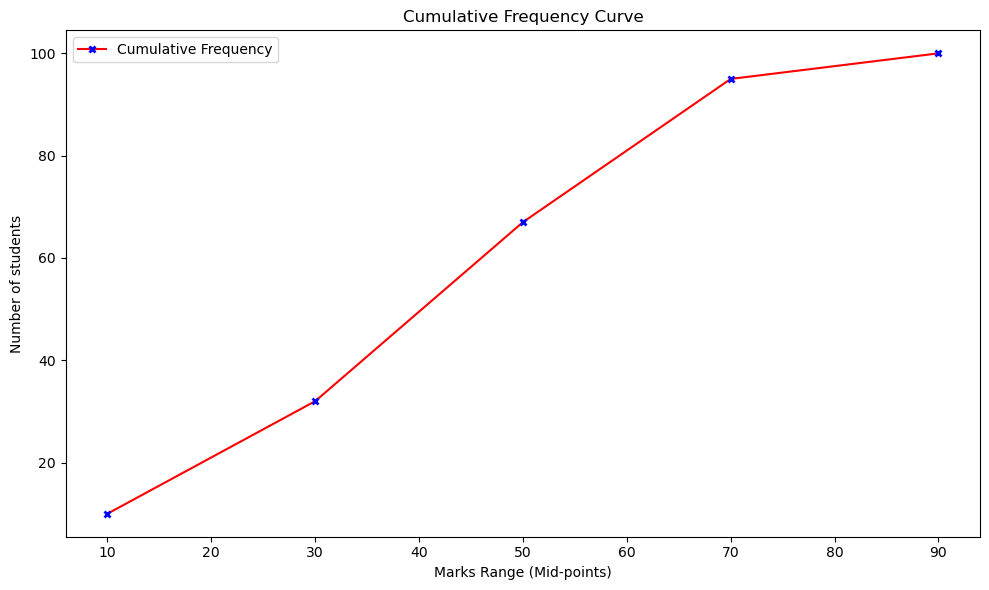

,Marks,no_of_students,mid_points,cumulative frequency
0,0-20,10,10.0,10
1,20-40,22,30.0,32
2,40-60,35,50.0,67
3,60-80,28,70.0,95
4,80-100,5,90.0,100


In [27]:
plt.figure(figsize=(10,6))
# sns.distplot(x, kde=True, norm_hist=True)
cumulative_frequency = np.cumsum(students_data['no_of_students'])
students_data['cumulative frequency'] = cumulative_frequency

sns.lineplot(x = students_data['mid_points'], 
             y = students_data['cumulative frequency'], 
             color='red', marker='x', markersize = 5, markeredgewidth = 2,
             markeredgecolor = 'blue', linestyle = '-', 
             label = 'Cumulative Frequency',)

# Add labels and titles
plt.title('Cumulative Frequency Curve')
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Number of students')

# Display the legend
plt.legend()
plt.tight_layout()

# Show the plot

plt.show()

display(students_data)

# Composition
- Pie Chart
- Stacked Bar Graph

# Pie Chart

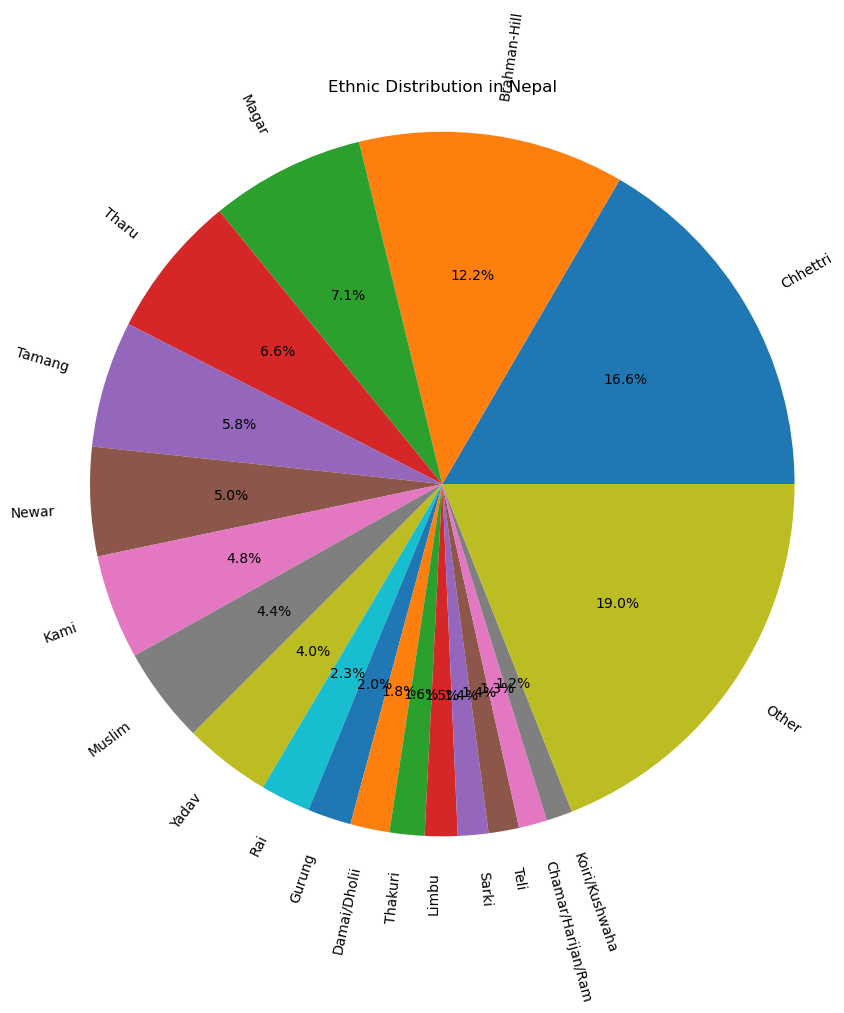

In [28]:
import matplotlib.pyplot as plt
import json
with open('data/nepal-population-ethinic-group.json', 'r') as file:
    ethinic_dist = json.load(file)

#Data 
labels = ethinic_dist.keys()
sizes = ethinic_dist.values()

#Create pie chart
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, rotatelabels=45)
plt.title('Ethnic Distribution in Nepal')
plt.axis('equal')

#Display the pie chart
plt.show()


# Stacked Bar Graph

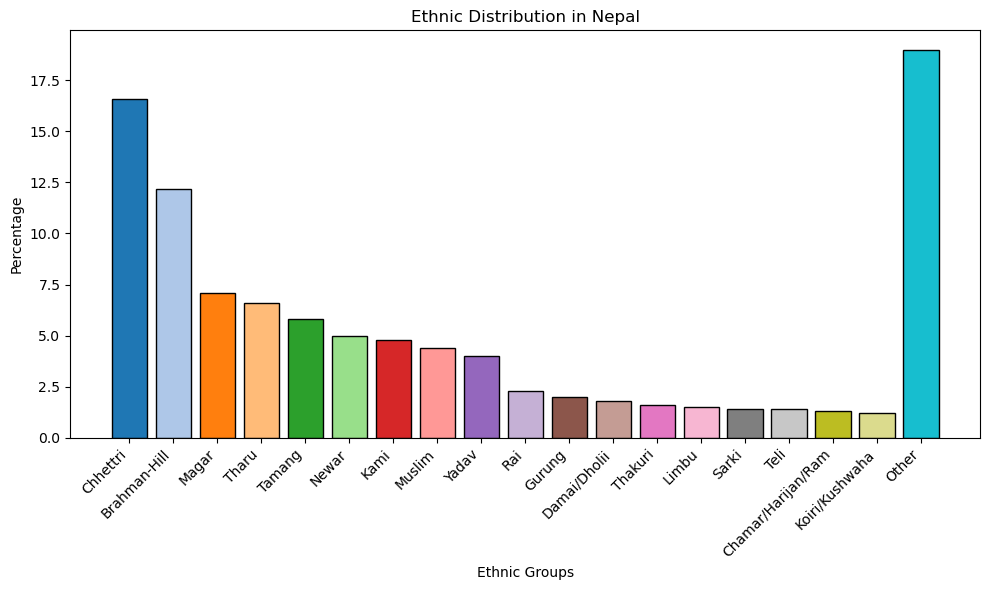

In [29]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load data
with open('data/nepal-population-ethinic-group.json', 'r') as file:
    ethnic_dist = json.load(file)

# Data
labels = list(ethnic_dist.keys())
sizes = list(ethnic_dist.values())

# Create figure and axis
plt.figure(figsize=(10, 6))

# Stacked bar plot
plt.bar(labels, sizes, color=plt.cm.tab20.colors[:len(labels)], edgecolor='black')

# Adding labels and title
plt.title('Ethnic Distribution in Nepal')
plt.xlabel('Ethnic Groups')
plt.ylabel('Percentage')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Display plot
plt.tight_layout()
plt.show()

# Introduction to Numpy
- NumPy stands for numerical python, is an open-source Python library that provides support for large, multi-dimensional arrays and matrices
- It also have a collection of high-level mathemetical functions to operate on arrays.

# Features of Numpy
- A powerful n-dimensional array object
- sophisticated (broadcasting) functions
- Tools for integrating C/C++ and Fortran code
- Linear algebra, fourier transform, and random number capabilities

# Numpy Array Creation
## From Python List, Tuple

In [30]:
import numpy as np
np_array = np.array([1,2,3,4,5,6]) #from list
print(np_array)
np_array_tuple = np.array((1,3,4,5)) #from tuple
print(np_array_tuple)
print(type(np_array))
print(np_array.dtype)

[1 2 3 4 5 6]
[1 3 4 5]
<class 'numpy.ndarray'>
int32


# Create array with default values
- create an array filled with zeros ``np.zeros( (2,2))``
- create an array filled with ones ``np.ones((2,2))``
- Create an array filled with a specific value ``np.full((2,2),3)``

In [31]:
zeros_array = np.zeros((2,2))
print(zeros_array)
ones_array = np.ones((3,4))
print(ones_array)
fill_array = np.full((2,2),5)
print(fill_array)
print(zeros_array.dtype)

[[0. 0.]
 [0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[5 5]
 [5 5]]
float64


# Creating Arrays with Ranges of Values
- ``np. arrange(0,25,5)`` # ``[0,5,10,25,20]`` similar to range
- ``np. Inespace (0,100,1000)`` create evenly spaced values (1000) between start (0)-
end(100)

In [32]:
np_arrange = np.arange(0,25,1) #Similar to range (0,25)
print(np_arrange)
np_line_space = np.linspace(0,100,100) #Create evenly spaced 100 points from 0-100
print(np_line_space)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[  0.           1.01010101   2.02020202   3.03030303   4.04040404
   5.05050505   6.06060606   7.07070707   8.08080808   9.09090909
  10.1010101   11.11111111  12.12121212  13.13131313  14.14141414
  15.15151515  16.16161616  17.17171717  18.18181818  19.19191919
  20.2020202   21.21212121  22.22222222  23.23232323  24.24242424
  25.25252525  26.26262626  27.27272727  28.28282828  29.29292929
  30.3030303   31.31313131  32.32323232  33.33333333  34.34343434
  35.35353535  36.36363636  37.37373737  38.38383838  39.39393939
  40.4040404   41.41414141  42.42424242  43.43434343  44.44444444
  45.45454545  46.46464646  47.47474747  48.48484848  49.49494949
  50.50505051  51.51515152  52.52525253  53.53535354  54.54545455
  55.55555556  56.56565657  57.57575758  58.58585859  59.5959596
  60.60606061  61.61616162  62.62626263  63.63636364  64.64646465
  65.65656566  66.66666667  67.67676768  68.68686869  69.6969697


# Identify diagonal matrices
- ``np.eye(3,3)``
- ``np.diag([1,2,3])``

In [33]:
identical_array = np.eye(3,3) #identify array
print(identical_array)
diagonal_array = np.diag([1,2,3]) #diagonal array
print(diagonal_array)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


# Random Arrays
- ``np. random.rand([3,3])`` create 3 x 3 array filled with random numbers
- ``np. random. rand([3,3])`` create 3 x 3 array of random numbers, where random numbers are from a standard normal distribution (mean=0, std=1)
- ``np. random. randint (1, 100, (3, 3))`` create 3 x 3 array of random numbers, where numbers are in between 1-100
- ``np. random. choice([1,2,3,4,5,6,10],size=(3,3))`` create 3 x 3 array of random numbers, where numbers are from given list
- ``np.random.normal(mu,sigma,1000)`` Create randaom array of elements 100 with mu = population mean and sigma = population standard deviation

[[0.7226424  0.8502252  0.33585936]
 [0.94621458 0.60934071 0.22426671]
 [0.29641902 0.87521245 0.58453047]]
[[24  4 76]
 [46 52 66]
 [51 61 61]]
[[ 5  3  6]
 [10  2  5]
 [ 2  2  2]]


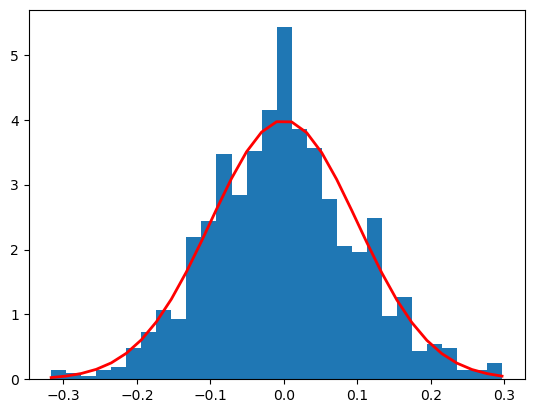

In [34]:
import matplotlib.pyplot as plt

# Create a 3x3 array of random numbers between 0 and 1
random_array = np.random.rand(3, 3)
print(random_array)

# Create a 3x3 array of random integers between 1 and 100
rand_in_betn = np.random.randint(1, 100, (3, 3))
print(rand_in_betn)

# Create a 3x3 array of random numbers chosen from the list [1, 2, 3, 4, 5, 6, 10]
rand_choice = np.random.choice([1, 2, 3, 4, 5, 6, 10], size=(3, 3))
print(rand_choice)

#draw histogram from normal distribution
mu, sigma = 0, 0.1  # Mean and standard deviation
rand_array_normal_distro = np.random.normal(mu, sigma, 1000)  # Normal distribution
count, bins, ignored = plt.hist(rand_array_normal_distro, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()
